In [115]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
Ts=np.array([174.45,174.45,174.45,174.51,174.45]) #Thill o Thot o Ton
Ps=np.array([315.7,322.4,322.6,312.1,316.8]) #pwr source
Pc=np.array([150.1,149.5,148.5,146.2,147.1]) #pwr cold region
Tcold=3

In [116]:
y=Ps/Pc

In [117]:
TR=(Ts-Tcold*y)/(y-1)
TR #Tsys

array([152.40244565, 145.2462406 , 143.23966111, 148.14383363,
       145.61694166])

Text(0.5, 1.0, 'Tsys (Ymethod) vs $\\Delta$ Tsys')

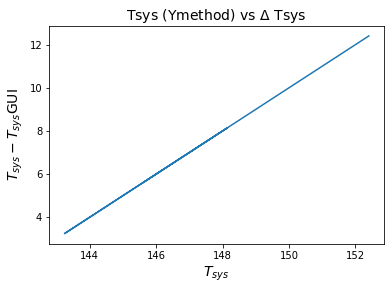

In [118]:
plt.plot(TR,TR-140)
plt.xlabel(r"$T_{sys}$",fontsize=14)
plt.ylabel(r"$T_{sys}-T_{sys}$GUI",fontsize=14)
plt.title("Tsys (Ymethod) vs $\Delta$ Tsys",fontsize=14)

In [398]:
def model(x,a):
    return a*x

[1.01067149]


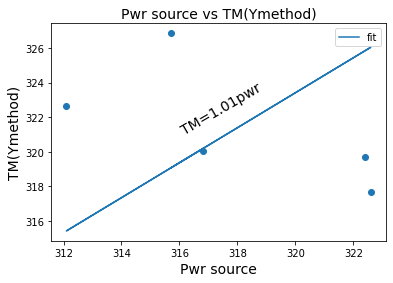

In [400]:
TM=Ts+TR
pol=sp.optimize.curve_fit(model, Ps,TM)
print(pol[0])
plt.scatter(Ps,TM)
plt.plot(Ps,Ps*pol[0],label="fit")
plt.title("Pwr source vs TM(Ymethod)",fontsize=14)
plt.xlabel("Pwr source",fontsize=14)
plt.ylabel("TM(Ymethod)",fontsize=14)
plt.annotate("TM={}pwr".format(np.round(pol[0][0],2)),(316,321),rotation=30,fontsize=14)
plt.legend()

In [401]:
Tsys_nuevo1=Trx1+Telev1+Tspill1
Tsys_nuevo2=Trx2+Telev2+Tspill2
Tsys_nuevo3=Trx3+Telev3+Tspill3

In [402]:
Tsys_nuevo1[:5]

array([130.39245452, 129.25671109, 129.41351168, 129.61880215,
       129.88309836])

In [403]:
pol_nuevo1=sp.optimize.curve_fit(model, Ps,(174.5+Tsys_nuevo1[:5]))
pol_nuevo2=sp.optimize.curve_fit(model, Ps,(174.5+Tsys_nuevo2[:5]))
pol_nuevo3=sp.optimize.curve_fit(model, Ps,(174.5+Tsys_nuevo3[:5]))

Text(0.5, 1.0, 'Tsys (Ymethod) vs $\\Delta$ Tsys az=30')

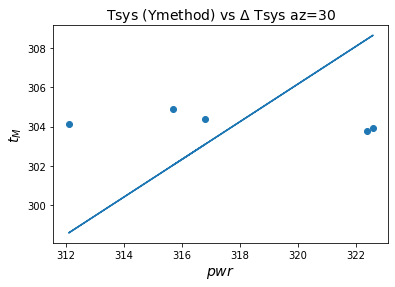

In [404]:
plt.scatter(Ps,(174.5+Tsys_nuevo1[:5]))
plt.plot(Ps,Ps*pol_nuevo1[0])
plt.xlabel(r"$pwr$",fontsize=14)
plt.ylabel(r"$t_{M}$",fontsize=14)
plt.title("Tsys (Ymethod) vs $\Delta$ Tsys az=30",fontsize=14)

Text(0.5, 1.0, 'Tsys (Ymethod) vs $\\Delta$ Tsys az=100')

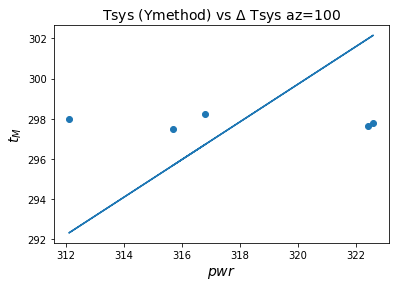

In [405]:
plt.scatter(Ps,(174.5+Tsys_nuevo2[:5]))
plt.plot(Ps,Ps*pol_nuevo2[0])
plt.xlabel(r"$pwr$",fontsize=14)
plt.ylabel(r"$t_{M}$",fontsize=14)
plt.title("Tsys (Ymethod) vs $\Delta$ Tsys az=100",fontsize=14)

Text(0.5, 1.0, 'Tsys (Ymethod) vs $\\Delta$ Tsys az=320')

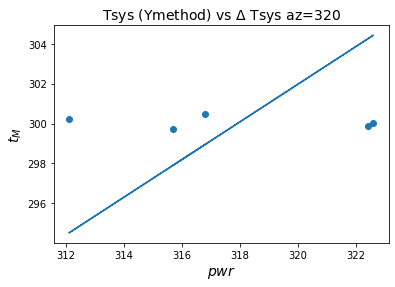

In [406]:
plt.scatter(Ps,(174.5+Tsys_nuevo3[:5]))
plt.plot(Ps,Ps*pol_nuevo3[0])
plt.xlabel(r"$pwr$",fontsize=14)
plt.ylabel(r"$t_{M}$",fontsize=14)
plt.title("Tsys (Ymethod) vs $\Delta$ Tsys az=320",fontsize=14)

PARTE 2

In [407]:
data1=open("/Users/mariajesusfloresmoraga/Desktop/spill_group4_1-202204.rad")
data2=open("/Users/mariajesusfloresmoraga/Desktop/spill_group4_2-202204.rad")
data3=open("/Users/mariajesusfloresmoraga/Desktop/spill_group4_3-202204.rad")

In [408]:
lines1=data1.readlines()
pos1=[*range(6,len(lines1),42)]
print(pos1)
elev1=[]
Tsys1=[]
Tant1=[]
for i in pos1:
    elev1.append(float(lines1[i][43:47]))
    Tsys1.append(float(lines1[i][73:80]))
    Tant1.append(float(lines1[i][87:92]))
    
lines2=data2.readlines()
pos2=[*range(6,len(lines2),42)]
elev2=[]
Tsys2=[]
Tant2=[]
for i in pos2:
    elev2.append(float(lines2[i][43:47]))
    Tsys2.append(float(lines2[i][73:80]))
    Tant2.append(float(lines2[i][87:92]))
    
lines3=data3.readlines()
pos3=[*range(6,len(lines3),42)]
elev3=[]
Tsys3=[]
Tant3=[]
for i in pos3:
    elev3.append(float(lines3[i][44:47]))
    Tsys3.append(float(lines3[i][73:80]))
    Tant3.append(float(lines3[i][87:92]))

[6, 48, 90, 132, 174, 216, 258, 300, 342, 384, 426, 468, 510, 552]


In [409]:
Telev1=Tatm*(1/np.cos(np.array(elev1)*np.pi/180))
Telev2=Tatm*(1/np.cos(np.array(elev2)*np.pi/180))
Telev3=Tatm*(1/np.cos(np.array(elev3)*np.pi/180))

Text(0, 0.5, 'T elevación [K]')

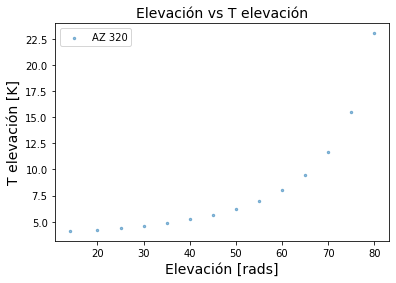

In [410]:
plt.scatter(elev1,Telev1,s=6,alpha=0.5,label="AZ 320")
plt.legend()
plt.title("Elevación vs T elevación",fontsize=14)
plt.xlabel("Elevación [rads]",fontsize=14)
plt.ylabel("T elevación [K]",fontsize=14)

Text(0, 0.5, 'T elevación [K]')

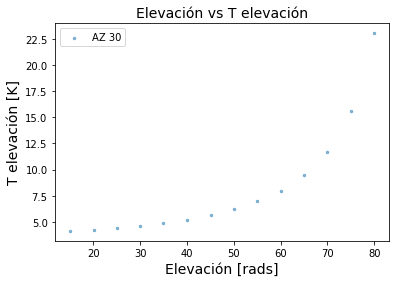

In [411]:
plt.scatter(elev2,Telev2,s=6,alpha=0.5,label="AZ 30")
plt.legend()
plt.title("Elevación vs T elevación",fontsize=14)
plt.xlabel("Elevación [rads]",fontsize=14)
plt.ylabel("T elevación [K]",fontsize=14)

Text(0, 0.5, 'T elevación [K]')

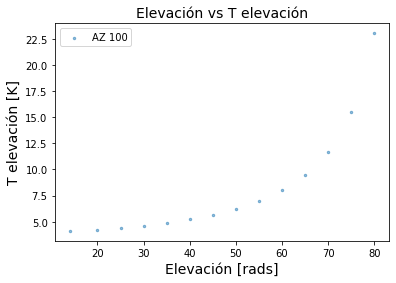

In [412]:
plt.scatter(elev3,Telev3,s=6,alpha=0.5,label="AZ 100")
plt.legend()
plt.title("Elevación vs T elevación",fontsize=14)
plt.xlabel("Elevación [rads]",fontsize=14)
plt.ylabel("T elevación [K]",fontsize=14)

Text(0, 0.5, 'T elevación [K]')

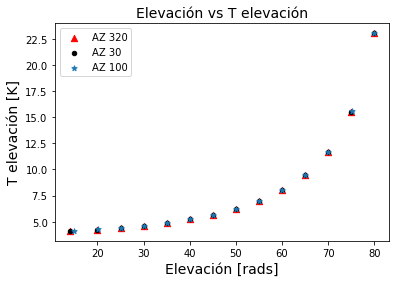

In [413]:
plt.scatter(elev3,Telev3,marker="^",c="r",s=40,alpha=1,label="AZ 320")
plt.scatter(elev1,Telev1,c="k",s=20,alpha=1,label="AZ 30")
plt.scatter(elev2,Telev2,marker="*",s=30,alpha=1,label="AZ 100")
plt.legend()
plt.title("Elevación vs T elevación",fontsize=14)
plt.xlabel("Elevación [rads]",fontsize=14)
plt.ylabel("T elevación [K]",fontsize=14)

In [414]:
def coordenadas(az,el):
    lat=-33.2692*np.pi/180
    a=np.sin(el)*np.sin(lat)+np.cos(el)*np.cos(lat)*np.cos(az)
    dec=np.arcsin(a)
    b=np.sin(el)-np.sin(lat)*np.sin(dec)/(np.cos(lat)*np.cos(dec))
    ra=np.arccos(b)
    return(ra,dec)

In [415]:
decs=[]
ras=[]

decs100=[]
ras100=[]

decs320=[]
ras320=[]

In [416]:
numeros=np.array([15,20,25,30,35,40,45,50,55,60,65,70,75,80])
numeros=numeros*np.pi/180
for i in numeros:
    ras.append(coordenadas(30*np.pi/180,i) [0])
    decs.append(coordenadas(30*np.pi/180,i) [1])
    
    ras100.append(coordenadas(100*np.pi/180,i) [0])
    decs100.append(coordenadas(100*np.pi/180,i) [1])
    
    ras320.append(coordenadas(320*np.pi/180,i) [0])
    decs320.append(coordenadas(320*np.pi/180,i) [1])

In [417]:
ras=np.rad2deg(np.array(ras))/15
ras100=np.rad2deg(np.array(ras100))/15
ras320=np.rad2deg(np.array(ras320))/15
#hora_l=int(divmod(ra_f,1)[0])
#min_l=divmod(ra_f,1)[1]*60
#minl=int(divmod(min_l,1)[0])
#sec_l=divmod(min_l,1)[1]*60
#secl=int(divmod(sec_l,1)[0])

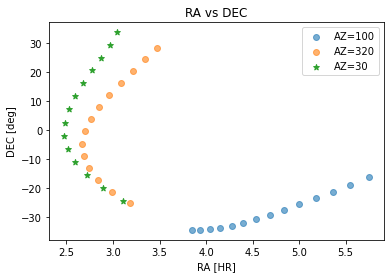

In [418]:
plt.scatter(ras100,np.rad2deg(decs100),alpha=0.6,label="AZ=100")
plt.scatter(ras320,np.rad2deg(decs320),alpha=0.6,label="AZ=320")
plt.scatter(ras,np.rad2deg(decs),marker="*",label="AZ=30")
plt.title("RA vs DEC")
plt.xlabel("RA [HR]")
plt.ylabel("DEC [deg]")
plt.legend()

In [419]:
Tsys1_corr=[]
for x,y,t in zip(ras,np.rad2deg(decs),Tsys1):
    if x<3 and y<30 and y>15:
        Tsys1_corr.append(t-4)
    else:
        Tsys1_corr.append(t-2.73)

In [420]:
Tsys2_corr=[]
for x,y,t in zip(ras100,np.rad2deg(decs100),Tsys2):
    if x<3 and y<30 and y>15:
        Tsys2_corr.append(t-4)
    else:
        Tsys2_corr.append(t-2.73)

In [421]:
Tsys3_corr=[]
for x,y,t in zip(ras320,np.rad2deg(decs320),Tsys3):
    if x<3 and y<30 and y>15:
        Tsys3_corr.append(t-4)
    else:
        Tsys3_corr.append(t-2.73)

In [422]:
Tatm=4
Trx=102
Tspill1=np.array(Tsys1_corr)-Tatm-Trx
Tspill2=np.array(Tsys2_corr)-Tatm-Trx
Tspill3=np.array(Tsys3_corr)-Tatm-Trx

#Tsource1=np.array(Tant1)-np.array(Tsys1)
#Tsource2=np.array(Tant2)-np.array(Tsys2)
#Tsource3=np.array(Tant3)-np.array(Tsys3)

#Tbg1=Tant1-Tsource1
#Tbg2=Tant2-Tsource2
#Tbg3=Tant3-Tsource3

In [423]:
len(Tspill1)

14

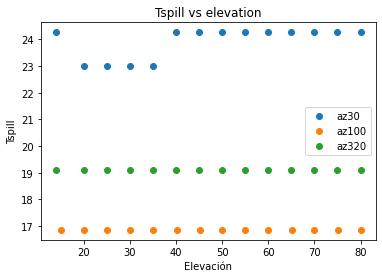

In [424]:
plt.scatter(elev1,Tspill1,label="az30")
plt.scatter(elev2,Tspill2,label="az100")
plt.scatter(elev3,Tspill3,label="az320")
plt.xlabel("Elevación")
plt.ylabel("Tspill")
plt.title("Tspill vs elevation")
plt.legend()

In [425]:
Trx1=np.array(Tsys1_corr)-Tatm-np.array(Tspill1)
print(Trx1,np.mean(Trx1))

[102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102.] 102.0


In [426]:
Trx2=np.array(Tsys2_corr)-Tatm-np.array(Tspill2)
print(Trx2,np.mean(Trx2))

[102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102.] 102.0


In [427]:
Trx3=np.array(Tsys3_corr)-Tatm-np.array(Tspill3)
print(Trx3,np.mean(Trx3))

[102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102. 102.] 102.0
